# Summaries Phenology Data

## Hamish

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.dates as mdates
import CAMP as camp
%matplotlib inline

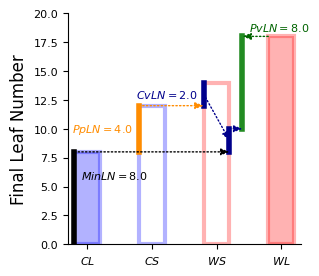

In [2]:
#Example figure using Brooking and Jamieson Data
Fig = plt.figure(figsize=(3,3))
Axis = Fig.add_subplot(1,1,1)
CL = 8
CS = 12
WS = 14
WL = 18
camp.plotFLNs(CL,CS,WS,WL,Axis,8,20)
camp.plotLNlines(CL, CS, WS, WL,8)

In [3]:
PP16NonSD = dt.date(2014,1,28)
PP16NonSD = pd.to_datetime(PP16NonSD)
PP16VernSD = dt.date(2014,5,6) - dt.timedelta(5) ##Planted on 5th of Mar but subtract 10 days to account for thermal time during vernalisation
PP16VernSD = pd.to_datetime(PP16VernSD)
PP8NonSD = dt.date(2014,7,22)
PP8NonSD = pd.to_datetime(PP8NonSD)
PP8VernSD = dt.date(2014,9,15) - dt.timedelta(5) ##Planted on 15th of Sep but subtract 10 days to account for thermal time during vernalisation
PP8VernSD = pd.to_datetime(PP8VernSD)
Cultivars = ['Otane',
         'BattenSpring',
         'Saracen',
         'BattenWinter',
         'Amarok',
         'CRWT153']

def StartDate(x):
    if Data.loc[x,'PhotoP'] == 16:
        if Data.loc[x,'Vern'] == 'Nil':
            return PP16NonSD 
        else:
            return PP16VernSD 
    else:
        if Data.loc[x,'Vern'] == 'Nil':
            return PP8NonSD 
        else:
            return PP8VernSD 

## Bring in data observed from stem disections and get into usable shape

In [4]:
Data = pd.read_excel('./RawData/NZ_CE/ResultswheatGEP.xlsx',
                      sheet_name='Data organized for export',
                     skiprows=1, engine = 'openpyxl')
Data.Date = pd.to_datetime(Data.Date)
Data.loc[:,'StartDate'] = [StartDate(x) for x in Data.index]
Data.loc[:,'DAS'] = Data.loc[:,'Date'] - Data.loc[:,'StartDate'] 
#Calculate Mean growth room temperature which is 21 for 8h pp and 23 for 16h pp
Data.loc[:,'TT'] = [Data.loc[x,'DAS']/np.timedelta64(1, 'D') * (21 + (Data.loc[x,'PhotoP']/8.0 -1.0) * 2) for x in Data.index]
Data.set_index(['FLN','PhotoP','Vern','Cult','Sample','Date'],inplace=True)
#Data.drop('Unnamed: 10',inplace=True,axis=1)
Data.sort_index(inplace=True)

In [5]:
#  Remove anomolious FLN data points.  Probably not at FLN
Data.loc[('YES',16,'Nil','CRWT153',196),'HS'][2] = np.nan
Data.loc[('YES',16,'Nil','CRWT153',240),'HS'][1:3] = np.nan

## Calculate Final leaf number and total organ number

In [6]:
PhenoStages = pd.DataFrame()
PhenoStages.loc[:,'FLN'] = Data.loc['YES',:].groupby(axis=0,level=['PhotoP','Vern','Cult']).mean('numeric_only').loc[:,'HS']
PhenoStages.loc[:,'TON'] = Data.loc['YES',:].groupby(axis=0,level=['PhotoP','Vern','Cult']).mean('numeric_only').loc[:,'PN']
PhenoStages.loc[:,'SN'] = PhenoStages.loc[:,'TON'].subtract(PhenoStages.loc[:,'FLN'])

In [7]:
PhenoStages

FLN        TON         SN
PhotoP Vern Cult                                         
8      Full Amarok        11.342857  31.518519  20.175661
            BattenSpring  11.750000        NaN        NaN
            BattenWinter  12.025000  29.000000  16.975000
            CRWT153       14.244444        NaN        NaN
            Otane          9.111111  28.000000  18.888889
            Saracen       10.256410        NaN        NaN
       Nil  Amarok        16.358974  34.666667  18.307692
            BattenSpring  12.141026  24.166667  12.025641
            BattenWinter  13.500000  27.600000  14.100000
            CRWT153       16.844444        NaN        NaN
            Otane          8.355263  23.319149  14.963886
            Saracen       11.133333  26.076923  14.943590
16     Full Amarok         9.136364  26.333333  17.196970
            BattenSpring   7.947368  22.000000  14.052632
            BattenWinter   8.277778  21.750000  13.472222
            CRWT153       14.272727  33.000000  18.727273
            Otane          6.652174  20.956522  14.304348
            Saracen        7.545455  23.954545  16.409091
       Nil  Amarok        15.190476  36.157895  20.967419
            BattenSpring   8.000000  23.208333  15.208333
            BattenWinter  15.500000  33.705882  18.205882
            CRWT153       15.625000  34.666667  19.041667
            Otane          6.935484  22.258065  15.322581
            Saracen       10.714286  32.750000  22.035714

## Make some graphs of final leaf number

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\97386133.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\97386133.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\97386133.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\9738

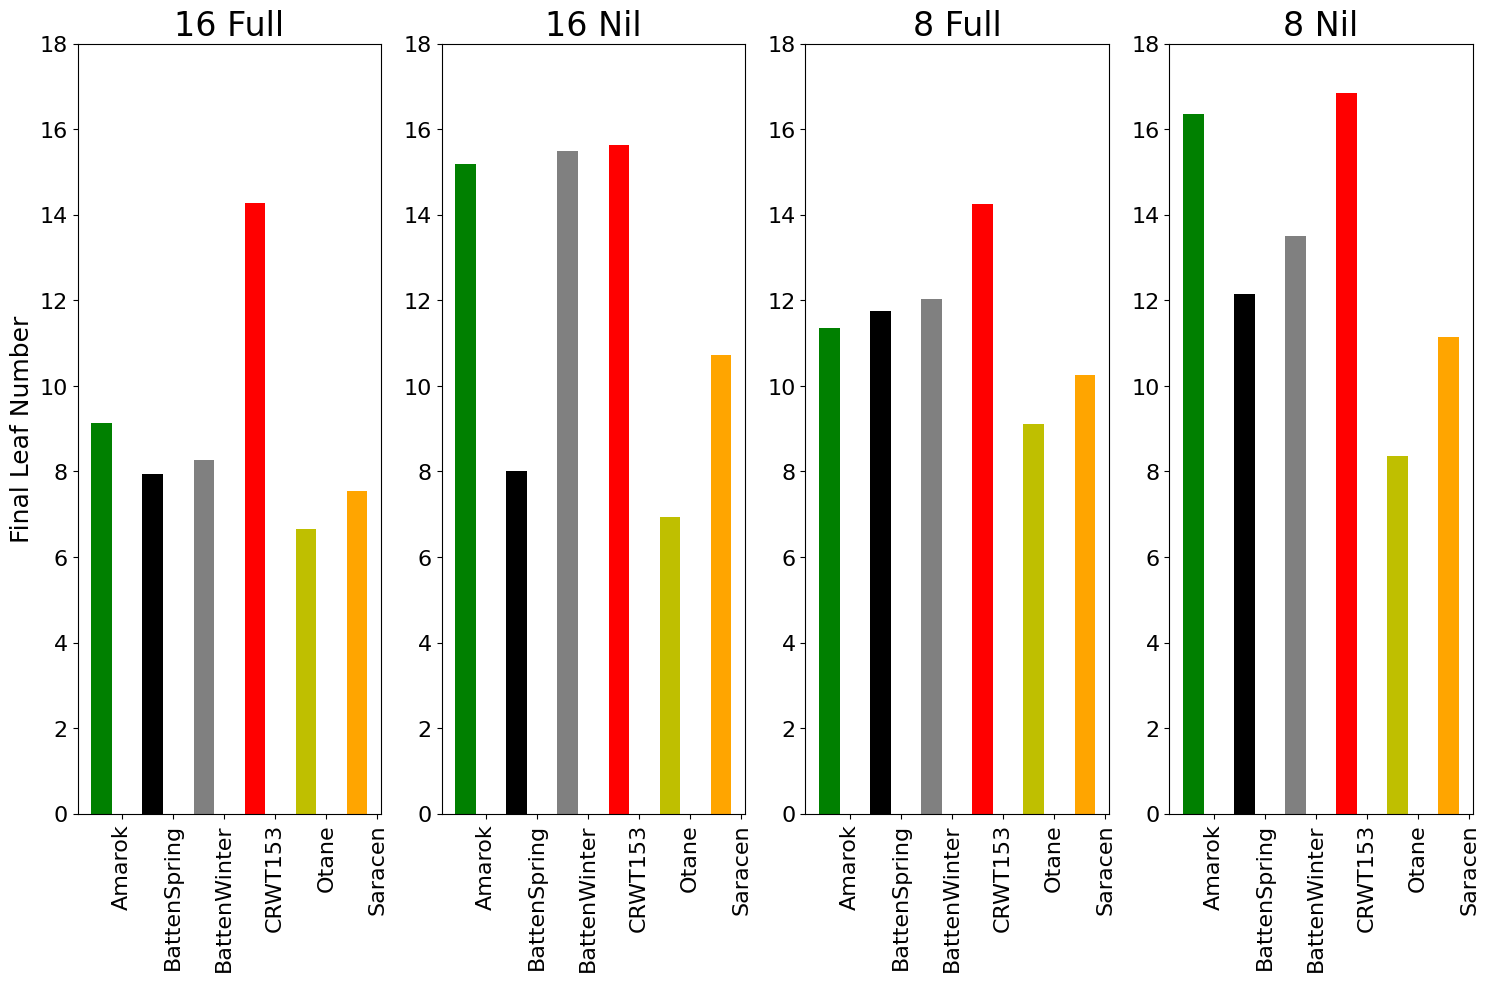

In [8]:
width = 0.4
ind = np.arange(6) + width
Fig = plt.figure(figsize=(18, 10))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for Pp in Photoperiods:
    for Vn in Vernalisations:
        Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
        plt.bar(ind, PhenoStages.loc[(Pp,Vn),'FLN'], width,color=['g','k','grey','r','y','orange'])
        for tick in Axis.get_xticklabels():
            tick.set_rotation(90)
        if Pos == 1:
            plt.ylabel('Final Leaf Number',fontsize=18)
        plt.tick_params(labelsize=16)
        plt.title(str(Pp) + ' ' + Vn,fontsize = 24)
        plt.xticks(ind+width)
        plt.ylim(0,18)
        Pos +=1
Fig.patch.set_facecolor('white')

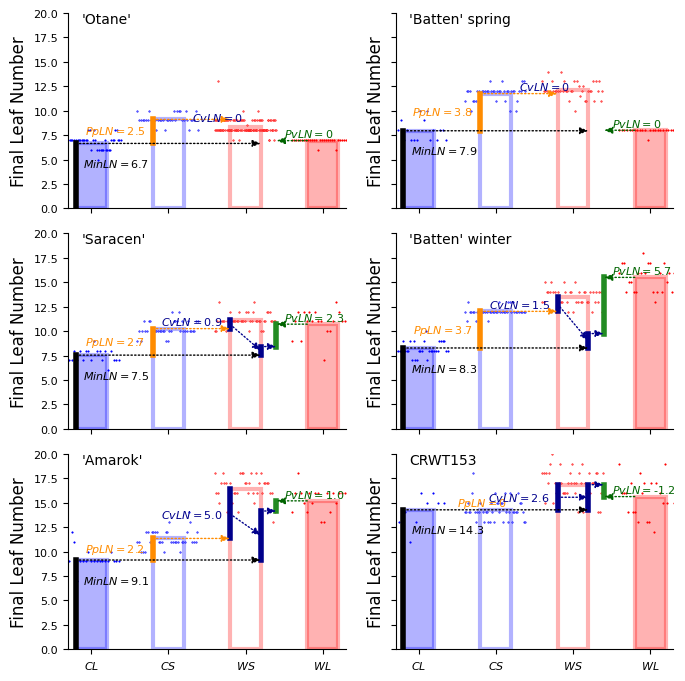

In [9]:
CultNames = pd.DataFrame(index = Cultivars,columns=['Name'],data=["'Otane'","'Batten' spring","'Saracen'","'Batten' winter","'Amarok'",'CRWT153'])

AllFLNData = Data.loc['YES',:].HS.reset_index().drop(['Date','Sample'],axis=1)

width = 0.4
ind = np.arange(4) + width
Fig = plt.figure(figsize=(6.92,6.92))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for cult in Cultivars:
    Axis = Fig.add_subplot(3,2,Pos)
    trt = 0
    colors = ['b','b','r','r']
    fills = ['b','w','w','r']
    for (Vn,Pp) in [("Full",16),("Full",8),("Nil",8),("Nil",16)]:
        Filter = (AllFLNData.PhotoP == Pp) & (AllFLNData.Vern == Vn) & (AllFLNData.Cult == cult)
        data = AllFLNData.loc[Filter,'HS']
        numObs = len(data)
        centre = ind[trt]+.2
        index = np.add(centre-.2,np.multiply(0.8,np.divide([float(x) for x in range(numObs)],numObs)))
        plt.plot(index,data,'o',ms=1,mec=colors[trt],mfc=fills[trt],mew=0.5)
        trt +=1
    
    CL = PhenoStages.loc[(16,'Full',cult),'FLN']
    CS = PhenoStages.loc[(8,'Full',cult), 'FLN']
    WS = PhenoStages.loc[(8,'Nil',cult), 'FLN']
    WL = PhenoStages.loc[(16,'Nil',cult),'FLN']
    
    camp.plotFLNs(CL,CS,WS,WL,Axis,8,20)
    camp.plotLNlines(CL, CS, WS, WL,8)
    Axis.spines['right'].set_visible(False)
    Axis.spines['top'].set_visible(False)
    if Pos in [5,6]:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    else:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
    if Pos in [2,4,6]:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
    else:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)
    plt.text(0.05,0.95,CultNames.loc[cult,'Name'],transform=Axis.transAxes)
    Pos +=1
plt.tight_layout()
#Fig.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig3.jpg',format='jpg',dpi=300)  
Fig.patch.set_facecolor('white')

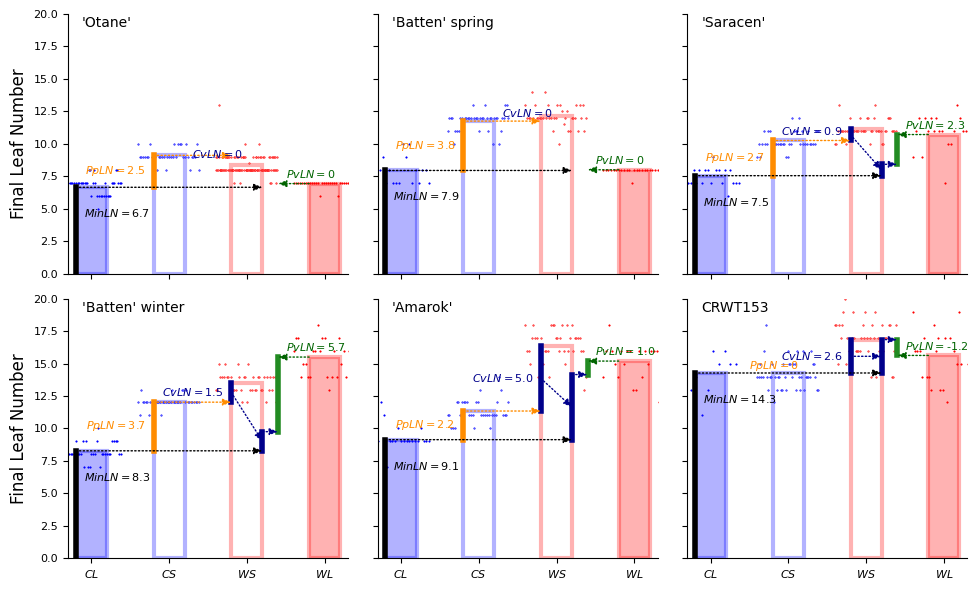

In [32]:
CultNames = pd.DataFrame(index = Cultivars,columns=['Name'],data=["'Otane'","'Batten' spring","'Saracen'","'Batten' winter","'Amarok'",'CRWT153'])

AllFLNData = Data.loc['YES',:].HS.reset_index().drop(['Date','Sample'],axis=1)

width = 0.4
ind = np.arange(4) + width
Fig = plt.figure(figsize=(10,6))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for cult in Cultivars:
    Axis = Fig.add_subplot(2,3,Pos)
    trt = 0
    colors = ['b','b','r','r']
    fills = ['b','w','w','r']
    for (Vn,Pp) in [("Full",16),("Full",8),("Nil",8),("Nil",16)]:
        Filter = (AllFLNData.PhotoP == Pp) & (AllFLNData.Vern == Vn) & (AllFLNData.Cult == cult)
        data = AllFLNData.loc[Filter,'HS']
        numObs = len(data)
        centre = ind[trt]+.2
        index = np.add(centre-.2,np.multiply(0.8,np.divide([float(x) for x in range(numObs)],numObs)))
        plt.plot(index,data,'o',ms=1,mec=colors[trt],mfc=fills[trt],mew=0.5)
        trt +=1
    
    CL = PhenoStages.loc[(16,'Full',cult),'FLN']
    CS = PhenoStages.loc[(8,'Full',cult), 'FLN']
    WS = PhenoStages.loc[(8,'Nil',cult), 'FLN']
    WL = PhenoStages.loc[(16,'Nil',cult),'FLN']
    
    camp.plotFLNs(CL,CS,WS,WL,Axis,8,20,False)
    camp.plotLNlines(CL, CS, WS, WL,8)
    Axis.spines['right'].set_visible(False)
    Axis.spines['top'].set_visible(False)
    if Pos in [4,5,6]:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    else:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
    if Pos in [2,3,5,6]:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
    else:
        plt.ylabel('Final Leaf Number',fontsize=12)
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)
    plt.text(0.05,0.95,CultNames.loc[cult,'Name'],transform=Axis.transAxes)
    Pos +=1
plt.tight_layout()
#Fig.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig3.jpg',format='jpg',dpi=300)  
Fig.patch.set_facecolor('white')

In [11]:
PhenoStages.FLN

PhotoP  Vern  Cult        
8       Full  Amarok          11.342857
              BattenSpring    11.750000
              BattenWinter    12.025000
              CRWT153         14.244444
              Otane            9.111111
              Saracen         10.256410
        Nil   Amarok          16.358974
              BattenSpring    12.141026
              BattenWinter    13.500000
              CRWT153         16.844444
              Otane            8.355263
              Saracen         11.133333
16      Full  Amarok           9.136364
              BattenSpring     7.947368
              BattenWinter     8.277778
              CRWT153         14.272727
              Otane            6.652174
              Saracen          7.545455
        Nil   Amarok          15.190476
              BattenSpring     8.000000
              BattenWinter    15.500000
              CRWT153         15.625000
              Otane            6.935484
              Saracen         10.714286
Name: FLN, dt

## Do some stats on FLN

In [12]:
FLN_lm = ols('HS ~ C(Cult)*C(PhotoP)*C(Vern)',AllFLNData.dropna()).fit()
FLN_Anova = sm.stats.anova_lm(FLN_lm)
FLN_Anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Cult),5.0,5491.184055,1098.236811,1181.726080,0.000000e+00
C(PhotoP),1.0,658.980249,658.980249,709.076712,1.289232e-113
C(Vern),1.0,808.523210,808.523210,869.988106,1.266771e-131
C(Cult):C(PhotoP),5.0,211.864505,42.372901,45.594139,1.090961e-41
C(Cult):C(Vern),5.0,817.203782,163.440756,175.865717,7.967066e-128
C(PhotoP):C(Vern),1.0,121.567563,121.567563,130.809274,3.030911e-28
C(Cult):C(PhotoP):C(Vern),5.0,228.689100,45.737820,49.214864,1.031143e-44
Residual,836.0,776.936373,0.929350,NaN,NaN


## Defining developmental phenotypes
From a +/- cold treatment, long/short photoperiod factorial we can determine 4 key phenological parameters.

1. Minimum Final Leaf Number.  This is the minimum leaf number that would be achieavable if the crop were fully vernalised prior to HS=2.0 and then grown in a long photoperiod. This can be quantified as: 

MinFLN = FLN_Full16h

2. Photoperiod responsiveness.  This occurs following vernalisation when shorter photo periods increase the FLN of wheat.  To determine this in the absence of confounding from cold temperature effects it should be calculated as the difference between FLN for long and short photoperiod treatments with cold treatment during prior to HS = 2.

PpLN = FLN_Full8h - FLN_Full16h

3. Cold vernalisation sensitivity.  This is the sensitivity of FLN of the cultivar to the absence of cold, i.e and extension of FLN due to warmer tempertures.  This can be calculated as:  

CvLN = FLN_Full8h - FLN_Nil8h

4. Short day vernalisation sensitivity.  This is when shorter  photoperiods decrease the vernalisation requirement.  If photoperiod had no effect on vernalisation we would expect the FLN of an unvernalised crop grown in 8h to be the same as the the FLN of the unvernalised crop grown in 16h plus the photoperiod response of the crop.  The difference between this theoretical FLN and the actual FLN recorded for an unvernalised crop grown at 8h Pp represents the short day vernalisation sensitivity:  

PvLN = (FLN_Nil16h + PPS) - FLN_Nil8h


In [13]:
def sig(p):
    if p > 0.05:
        return 'ns'
    if p > 0.01:
        return '*'
    if p > 0.001:
        return '**'
    else:
        return '***'

PhenologyTraits = pd.DataFrame(index=Cultivars,columns=['MinLN','PpLN','p PpLN','CvLN','p CvLN','PvLN','p PvLN'])
for cult in Cultivars:
    PhenologyTraits.loc[cult,'MinLN'] = np.round(PhenoStages.loc[(16,'Full',cult),'FLN'],decimals=2)
    PhenologyTraits.loc[cult,'PpLN'] = np.round(PhenoStages.loc[(8,'Full',cult),'FLN'] - PhenologyTraits.loc[cult,'MinLN'] , decimals=2)
    LongPp = Data.loc[('YES',16,'Full',cult),['HS']]
    ShortPp = Data.loc[('YES',8,'Full',cult),['HS']]
    PpSensitive = stats.ttest_ind(LongPp,ShortPp)
    PhenologyTraits.loc[cult,'p PpLN'] = sig(PpSensitive.pvalue[0])
    PhenologyTraits.loc[cult,'CvLN'] = np.round(max(0,PhenoStages.loc[(8,'Nil',cult),'FLN'] - PhenologyTraits.loc[cult,'MinLN'] - PhenologyTraits.loc[cult,'PpLN']),decimals=2)
    FullVrn = Data.loc[('YES',8,'Nil',cult),['HS']]
    NilVrn =  PhenologyTraits.loc[cult,'MinLN'] + PhenologyTraits.loc[cult,'PpLN']
    VrnSensitive = stats.ttest_ind(NilVrn,FullVrn)
    PhenologyTraits.loc[cult,'p CvLN'] = sig(VrnSensitive.pvalue[0])
    NoSVS = PhenologyTraits.loc[cult,'MinLN'] + PhenologyTraits.loc[cult,'CvLN']
    SDVS = Data.loc[('YES',16,'Nil',cult),['HS']]
    SDVSensitivie = stats.ttest_ind(NoSVS,SDVS)
    PhenologyTraits.loc[cult,'p PvLN'] = sig(SDVSensitivie.pvalue[0])
    PhenologyTraits.loc[cult,'PvLN'] = np.round(PhenoStages.loc[(16,'Nil',cult),'FLN'] - PhenologyTraits.loc[cult,'MinLN'] - PhenologyTraits.loc[cult,'CvLN'] , decimals=2)
    
PhenologyTraits.to_excel('./ProcessedData/PhenoTable.xlsx',)
PhenologyTraits

,MinLN,PpLN,p PpLN,CvLN,p CvLN,PvLN,p PvLN
Otane,6.65,2.46,***,0,ns,0.29,ns
BattenSpring,7.95,3.8,***,0.39,ns,-0.34,ns
Saracen,7.55,2.71,***,0.87,ns,2.29,ns
BattenWinter,8.28,3.75,***,1.47,ns,5.75,***
Amarok,9.14,2.2,***,5.02,***,1.03,ns
CRWT153,14.27,-0.03,ns,2.6,ns,-1.24,***


In [14]:
PhenologyTraits.columns = ['MLN','PPS','p ^PS','CVS','p ^{CV}S','SDVS','p ^{SDV}S']

## Graph spikelet number to find patterns

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\151092746.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\151092746.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\151092746.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\1

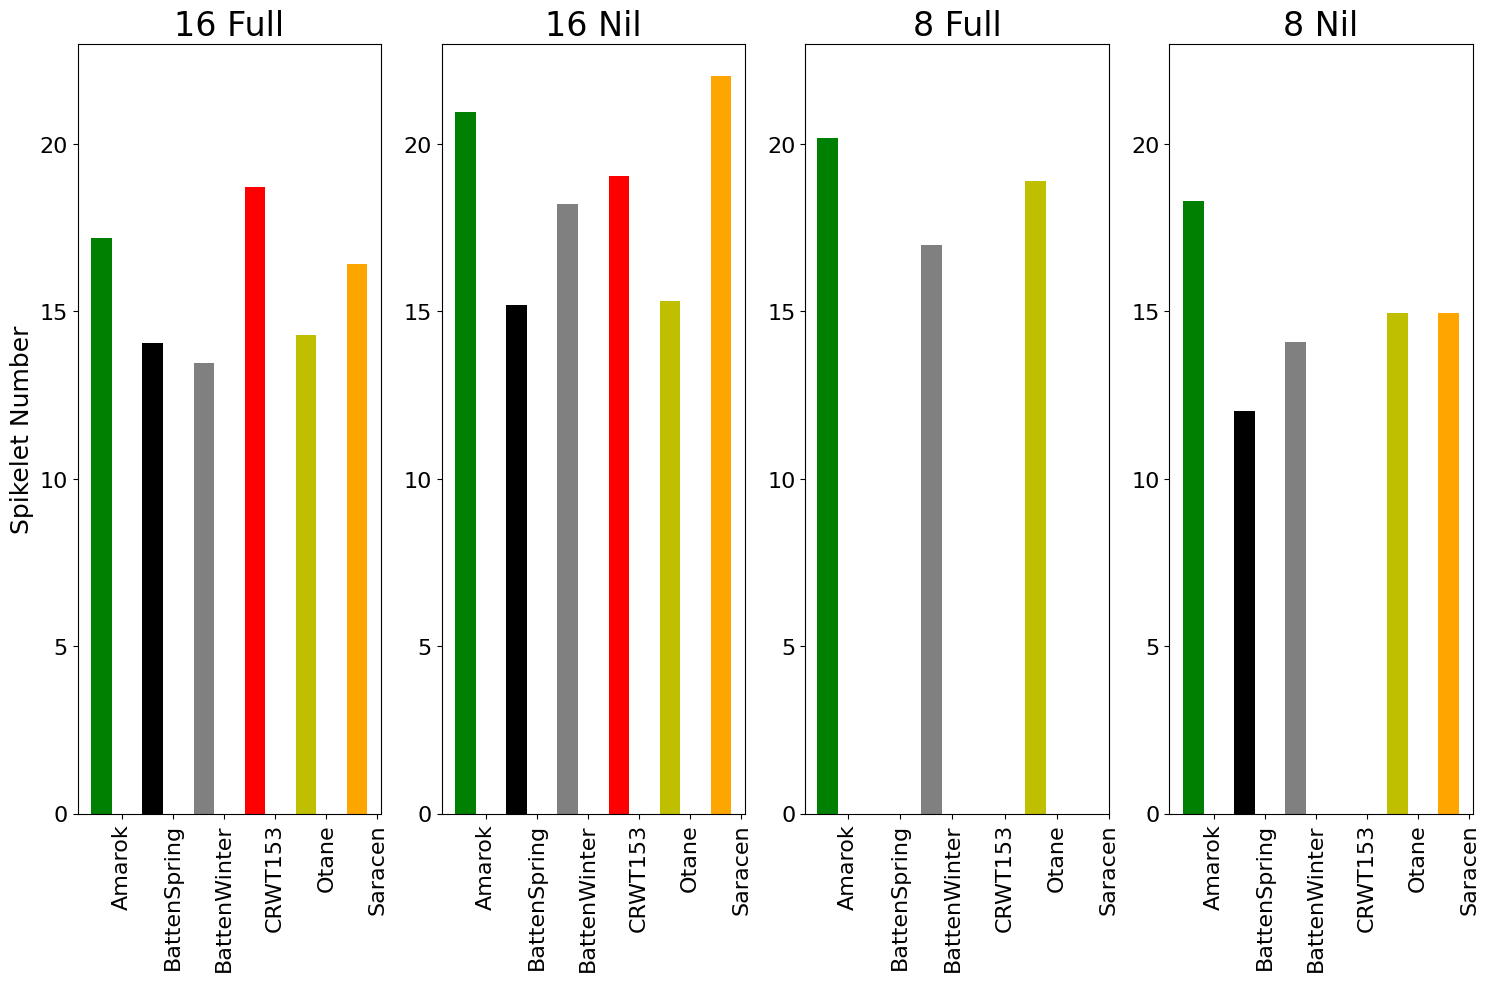

In [15]:
width = 0.4
ind = np.arange(6) + width
Fig = plt.figure(figsize=(18, 10))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for Pp in Photoperiods:
    for Vn in Vernalisations:
        Axis = Fig.add_subplot(1,4,Pos, xticklabels=['Amarok','BattenSpring', 'BattenWinter', 'CRWT153', 'Otane', 'Saracen'])
        plt.bar(ind, PhenoStages.loc[(Pp,Vn),'SN'], width,color=['g','k','grey','r','y','orange'])
        for tick in Axis.get_xticklabels():
            tick.set_rotation(90)
        if Pos == 1:
            plt.ylabel('Spikelet Number',fontsize=18)
        plt.tick_params(labelsize=16)
        plt.title(str(Pp) + ' ' + Vn,fontsize = 24)
        plt.xticks(ind+width)
        plt.ylim(0,23)
        Pos +=1
Fig.patch.set_facecolor('white')

Spikelet appears to show a similar pattern accross cultivars the the values differ with pp and vrn treatment  #For CRWT153 spikelet number is similar to the highest values for othere cultivars.  Thus:

In [16]:
SNCRWT153ShortNil = 17
SNCRWT153ShortFull = 20

### Spikelet number for BattenSpringing is similar to BattenWinterter, thus:

In [17]:
SNBattenSpringShortFull = 15

### Spikelet number for Saracen is toward the higher end of the range, thus:

In [18]:
SNSaracenShortFull = 19

## Make graphs of Haun Stage and Total Organ Number against date to display experimental patterns

In [19]:
dt.datetime.strptime('2014-01-01','%Y-%m-%d')

datetime.datetime(2014, 1, 1, 0, 0)

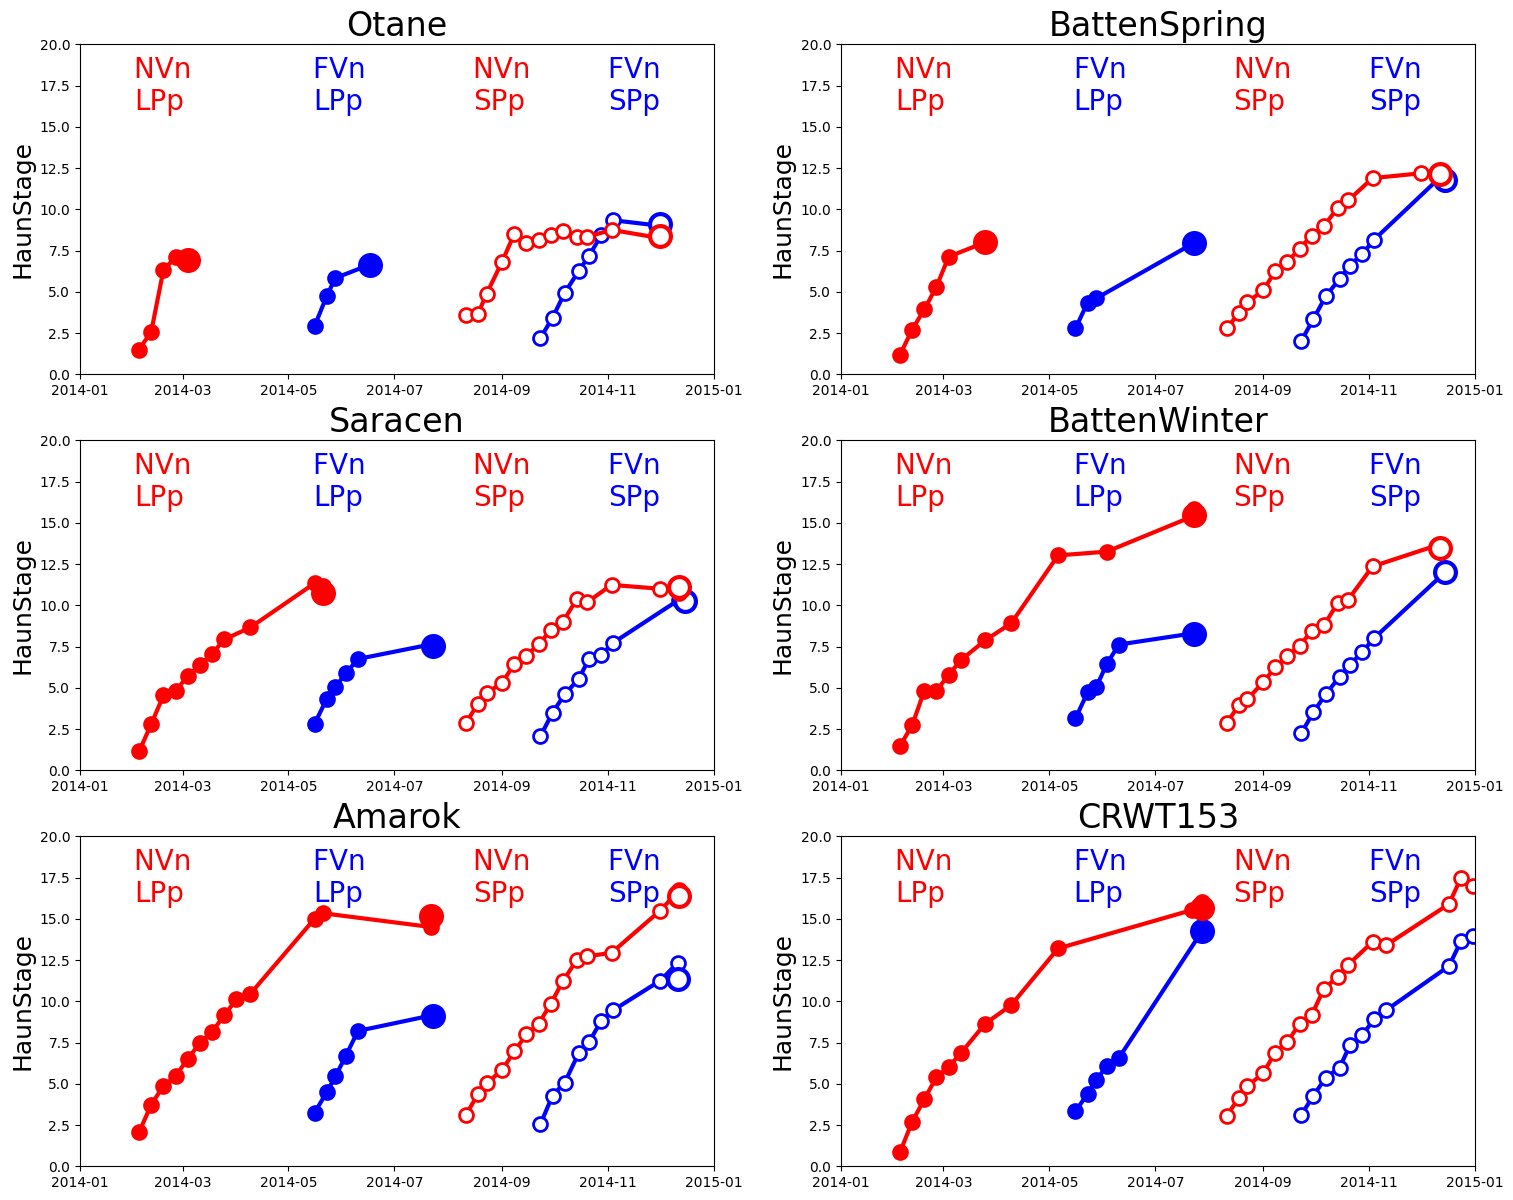

In [20]:
#Cultivars = HSData.index.levels[3].tolist()
HaunMeans = Data.loc[:,['HS']].groupby(level=('PhotoP','Vern','Cult','Date')).mean()
FLNDates = Data.loc['YES',['HS']].groupby(level=('PhotoP','Vern','Cult','Date')).mean()
FLNMeans = Data.loc['YES',['HS']].groupby(level=('PhotoP','Vern','Cult')).mean()
Graph = plt.figure(figsize=(18,30))
Colors = ['b','r','b','r']
FillColors = ['b','r','w','w']

Pos=1
for Cult in Cultivars:
    Fig = Graph.add_subplot(6,2,Pos)
    ColPos = 0
    FillPos = 0
    for Photo in Photoperiods:
        for Vern in Vernalisations:
            plt.plot(HaunMeans.loc[(Photo,Vern,Cult)].index,HaunMeans.loc[(Photo,Vern,Cult)],
                     '-o',color = Colors[ColPos],mec=Colors[ColPos],mfc=FillColors[FillPos],mew=2,linewidth = 3,markersize=10)
            plt.plot(FLNDates.loc[(Photo,Vern,Cult)].index[-1:],FLNMeans.loc[(Photo,Vern,Cult)],
                     'o', mec = Colors[ColPos],mfc=FillColors[FillPos],mew=3,markersize=15)
            plt.ylim(0,20)
            plt.xlim(dt.datetime.strptime('2014-01-01','%Y-%m-%d'),
                     dt.datetime.strptime('2015-01-01','%Y-%m-%d'))
            plt.title(Cult,fontsize=24)
            plt.ylabel('HaunStage',fontsize=18)
            ColPos +=1
            FillPos +=1
    plt.text(dt.datetime.strptime('2014-02-01','%Y-%m-%d'),16,'NVn \nLPp',fontsize=20,color='r')
    plt.text(dt.datetime.strptime('2014-05-15','%Y-%m-%d'),16,'FVn \nLPp',fontsize=20,color='b')
    plt.text(dt.datetime.strptime('2014-8-15','%Y-%m-%d'),16,'NVn \nSPp',fontsize=20,color='r')
    plt.text(dt.datetime.strptime('2014-11-01','%Y-%m-%d'),16,'FVn \nSPp',fontsize=20,color='b')
    Pos +=1
Graph.patch.set_facecolor('white')

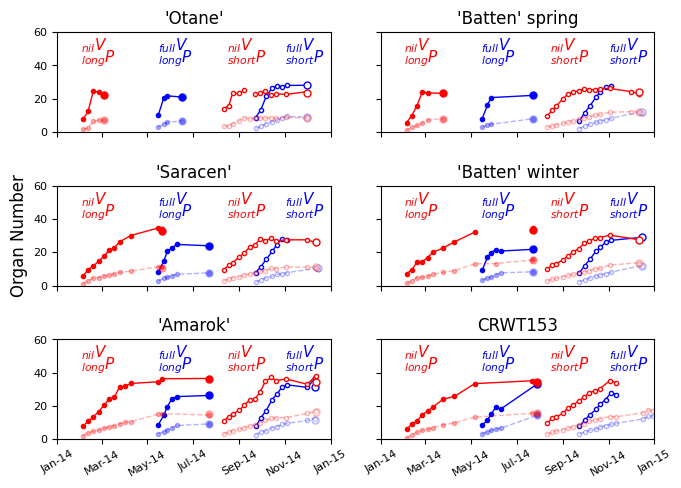

In [21]:
OrganMeans = Data.loc[:,['PN']].groupby(level=('PhotoP','Vern','Cult','Date')).mean()
TONDates = Data.loc['YES',['PN']].groupby(level=('PhotoP','Vern','Cult','Date')).mean()
TONMeans = Data.loc['YES',['PN']].groupby(level=('PhotoP','Vern','Cult')).mean()
Graph = plt.figure(figsize=(6.92,9.2))
Colors = ['b','r','b','r']
FilCols = ['b','r','w','w']
alpVals = [1,0.3] 

Pos=1
for Cult in Cultivars:
    Fig = Graph.add_subplot(6,2,Pos)
    ColPos = 0
    for Photo in Photoperiods:
        for Vern in Vernalisations:
            plt.plot(OrganMeans.loc[(Photo,Vern,Cult)].index,OrganMeans.loc[(Photo,Vern,Cult)],
                     '-o',mec = Colors[ColPos],mfc = FilCols[ColPos],mew=1,markersize=3,color=Colors[ColPos],linewidth = 1)
            plt.plot(TONDates.loc[(Photo,Vern,Cult)].index[-1:],TONMeans.loc[(Photo,Vern,Cult)],
                     'o', mec = Colors[ColPos],mfc = FilCols[ColPos],mew=1,markersize=5)
            plt.plot(HaunMeans.loc[(Photo,Vern,Cult)].index,HaunMeans.loc[(Photo,Vern,Cult)],
                     '--o',mec = Colors[ColPos],color=Colors[ColPos],mfc=FilCols[ColPos],mew=1,linewidth = 1,markersize=3,alpha=0.3)
            plt.plot(FLNDates.loc[(Photo,Vern,Cult)].index[-1:],FLNMeans.loc[(Photo,Vern,Cult)],
                     'o', mec = Colors[ColPos],markersize=5, mew=1 ,mfc=FilCols[ColPos],alpha=0.3)
            plt.ylim(0,60)
            plt.xlim(dt.datetime.strptime('2014-01-01','%Y-%m-%d'),
                     dt.datetime.strptime('2015-01-01','%Y-%m-%d'))
            CultName = CultNames.loc[Cult,'Name']
            plt.title(CultName,fontsize=12)
            if Pos == 3:
                plt.ylabel('Organ Number',fontsize=12)
            plt.tick_params(labelsize=8)
            ColPos +=1
    plt.text(dt.datetime.strptime('2014-02-01','%Y-%m-%d'),42,'$_{nil}V$ \n$_{long}P$',fontsize=11,color='r',linespacing=0.5)
    plt.text(dt.datetime.strptime('2014-05-15','%Y-%m-%d'),42,'$_{full}V$ \n$_{long}P$',fontsize=11,color='b',linespacing=0.5)
    plt.text(dt.datetime.strptime('2014-8-15','%Y-%m-%d'),42,'$_{nil}V$ \n$_{short}P$',fontsize=11,color='r',linespacing=0.5)
    plt.text(dt.datetime.strptime('2014-11-01','%Y-%m-%d'),42,'$_{full}V$ \n$_{short}P$',fontsize=11,color='b',linespacing=0.5)
    Fig.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    if Pos in [5,6]:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True, rotation = 30)
    else:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
    if Pos in [2,4,6]:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
    else:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)

    Pos +=1
plt.tight_layout()
#Graph.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig4.jpg',format='jpg',dpi=300) 
Graph.patch.set_facecolor('white')

## Estimate values for TON for treatments where spikelet number was not measured and estimate other phenoStage data

In [22]:
PhenologyTraits.columns

Index(['MLN', 'PPS', 'p ^PS', 'CVS', 'p ^{CV}S', 'SDVS', 'p ^{SDV}S'], dtype='object')

In [23]:
TONMeans
def FITS(Pp):
    if Pp == 8:
        return 5
    if Pp == 16:
        return 2

def FITS_geno(ind):
    if ind[0] == 8:
        PPS = PhenologyTraits.loc[ind[2],'PPS']
        return 2 + PPS/1.1
    if ind[0] == 16:
        return 2
PhenoStages.sort_index(inplace=True)
#Put estimated organ numbers in for those that are missing
PhenoStages.loc[(8,'Full','BattenSpring'),'TON'] = PhenoStages.loc[(8,'Full','BattenSpring'),'FLN'] + SNBattenSpringShortFull
Data.loc[('YES',8,'Full','BattenSpring'),['PN']] = PhenoStages.loc[(8,'Full','BattenSpring'),'FLN'] + SNBattenSpringShortFull
PhenoStages.loc[(8,'Full','CRWT153'),'TON'] = PhenoStages.loc[(8,'Full','CRWT153'),'FLN'] + SNCRWT153ShortFull
Data.loc[('YES',8,'Full','CRWT153'),['PN']] = PhenoStages.loc[(8,'Full','CRWT153'),'FLN'] + SNCRWT153ShortFull
PhenoStages.loc[(8,'Full','Saracen'),'TON'] = PhenoStages.loc[(8,'Full','Saracen'),'FLN'] + SNSaracenShortFull
Data.loc[('YES',8,'Full','Saracen'),['PN']] = PhenoStages.loc[(8,'Full','Saracen'),'FLN'] + SNSaracenShortFull
PhenoStages.loc[(8,'Nil','CRWT153'),'TON'] = PhenoStages.loc[(8,'Nil','CRWT153'),'FLN'] + SNCRWT153ShortNil
Data.loc[('YES',8,'Nil','CRWT153'),['PN']] = PhenoStages.loc[(8,'Nil','CRWT153'),'FLN'] + SNCRWT153ShortNil
Data
intercepts = pd.DataFrame(index = Cultivars, columns = ['int'], 
                          data = [2, 2.86, 2, 2.86, 2.86, 2.86])
#Haun Stage at Terminal Spikelet (HSTS)
PhenoStages.loc[:,'HSTS'] = [(PhenoStages.loc[x,'FLN'] - intercepts.loc[x[2],'int'])/1.1 for x in PhenoStages.index]
#Haun stages from Floral initiation to Terminal Spikelet (FITS)
#PhenoStages.loc[:,'FITS'] = [FITS(x) for x in PhenoStages.index.get_level_values(0)] 
PhenoStages.loc[:,'FITS'] = [FITS_geno(x) for x in PhenoStages.index] 
#Haun Stage at Floral Initiation (HSFI)
PhenoStages.loc[:,'HSFI'] = PhenoStages.loc[:,'HSTS'] - PhenoStages.loc[:,'FITS'] 
BaseHS = [1,3.5,8,16,19]
BaseON = [4.7,9.5,22.5,42,42]
#Organ number at Floral Initiation (ONFI)
PhenoStages.loc[:,'ONFI'] = [np.interp(PhenoStages.loc[x,'HSFI'], BaseHS, BaseON)for x in PhenoStages.index]   
PhenoStages.to_csv('.\ProcessedData\PhenoStages.csv',header=True)

## Make graph of Organ number against Haun Stage

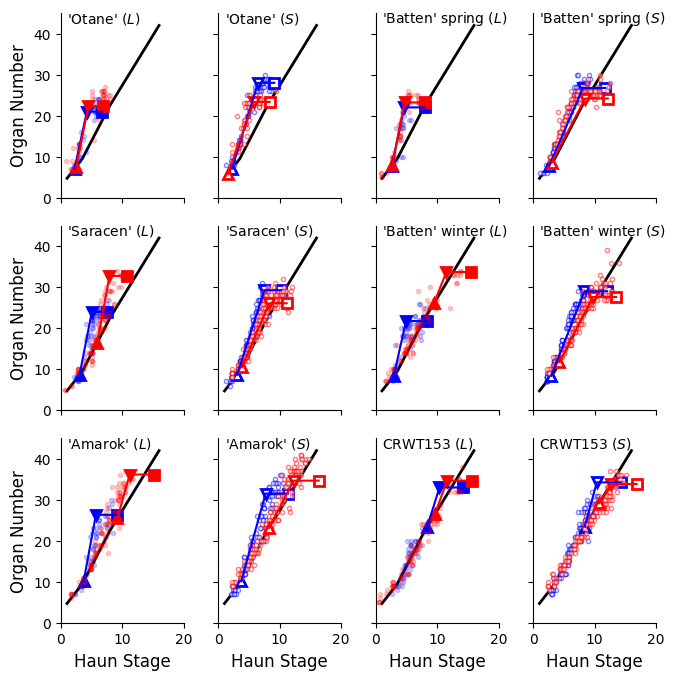

In [24]:
Index = pd.MultiIndex.from_product([Photoperiods,Vernalisations],names = ['Photoperiod','Vernalisation'])
colors = pd.DataFrame(index = Index, columns = ['mec','mfc','alpha'],
            data=np.transpose([['b','r','b','r'],['b','r','w','w'],[0.2,0.2,0.5,0.5]]))
PpSymbols = pd.DataFrame(index = Photoperiods,columns=['Name'],data=['$(L)$','$(S)$'])
colors.alpha = pd.to_numeric(colors.alpha)
Fig = plt.figure(figsize=(6.92,6.92))
Position = 1 
for Cultivar in Cultivars:
    for Pp in Photoperiods:
        ax = Fig.add_subplot(3,4,Position)
        ax.set_prop_cycle(color=['k','r','r','r','g','g','g'])
        cult = CultNames.loc[Cultivar,'Name']
        PpSym = PpSymbols.loc[Pp,'Name']
        plt.text(0.05,0.95,cult + ' ' + PpSym, fontsize=10, transform=ax.transAxes)
        plt.plot(BaseHS[0:4],BaseON[0:4], '-', linewidth = 2, label='Base Rate');
        for Vern in Vernalisations:
            plt.plot(Data.loc[('NO',Pp,Vern,Cultivar),'HS'], 
                     Data.loc[('NO',Pp,Vern,Cultivar),'PN'], 
                     'o',mec = colors.loc[(Pp,Vern),'mec'],
                     mfc = colors.loc[(Pp,Vern),'mfc'],
                     alpha=colors.loc[(Pp,Vern),'alpha'],
                     markersize=3, label= str(Pp) + ' ' + Vern)
            plt.plot(PhenoStages.loc[(Pp,Vern,Cultivar),'FLN'], 
                     PhenoStages.loc[(Pp,Vern,Cultivar),'TON'], 
                     's',mec = colors.loc[(Pp,Vern),'mec'],
                     mfc = colors.loc[(Pp,Vern),'mfc'],
                     alpha=1.0,markersize=7,mew=2, label = '_nolegend_')
            plt.plot(PhenoStages.loc[(Pp,Vern,Cultivar),'HSFI'], 
                     PhenoStages.loc[(Pp,Vern,Cultivar),'ONFI'], 
                     '^',mec = colors.loc[(Pp,Vern),'mec'],
                     mfc = colors.loc[(Pp,Vern),'mfc'],
                     alpha=1.0,markersize=7,mew=2, label = '_nolegend_')
            plt.plot(PhenoStages.loc[(Pp,Vern,Cultivar),'HSTS'], 
                     PhenoStages.loc[(Pp,Vern,Cultivar),'TON'], 
                     'v',mec = colors.loc[(Pp,Vern),'mec'],
                     mfc = colors.loc[(Pp,Vern),'mfc'],
                     alpha=1.0,markersize=7,mew=2, label = '_nolegend_')
            #plt.legend(loc=4, fontsize=20)
            plt.ylim(0,45);
            plt.xlim(0,20);
            if Position in [9,10,11,12]:
                plt.xlabel('Haun Stage', fontsize=12);
            if Position in [1,5,9]:
                plt.ylabel('Organ Number', fontsize=12);
            plt.tick_params(labelsize=10)
        for Vern in Vernalisations:
            plt.plot(PhenoStages.loc[(Pp,Vern,Cultivar),['HSFI','HSTS','FLN']],
                     PhenoStages.loc[(Pp,Vern,Cultivar),['ONFI','TON','TON']],
                     '-', color = colors.loc[(Pp,Vern),'mec'], linewidth = 1.5, label = '_nolegend_')
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        if Position in [9,10,11,12]:
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
        else:
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
        if Position in [2,3,4,6,7,8,10,11,12]:
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
        else:
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)
        Position += 1
plt.tight_layout()
#Fig.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig5.jpg',format='jpg',dpi=300)  
Fig.patch.set_facecolor('white')

In [25]:
PhenoStages.loc[PhenoStages.index.isin(['BattenSpring'],2),:]

FLN        TON         SN      HSTS      FITS  \
PhotoP Vern Cult                                                                
8      Full BattenSpring  11.750000  26.750000        NaN  8.081818  5.454545   
       Nil  BattenSpring  12.141026  24.166667  12.025641  8.437296  5.454545   
16     Full BattenSpring   7.947368  22.000000  14.052632  4.624880  2.000000   
       Nil  BattenSpring   8.000000  23.208333  15.208333  4.672727  2.000000   

                              HSFI      ONFI  
PhotoP Vern Cult                              
8      Full BattenSpring  2.627273  7.824364  
       Nil  BattenSpring  2.982751  8.506881  
16     Full BattenSpring  2.624880  7.819770  
       Nil  BattenSpring  2.672727  7.911636

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\2360603517.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\2360603517.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\2360603517.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\U

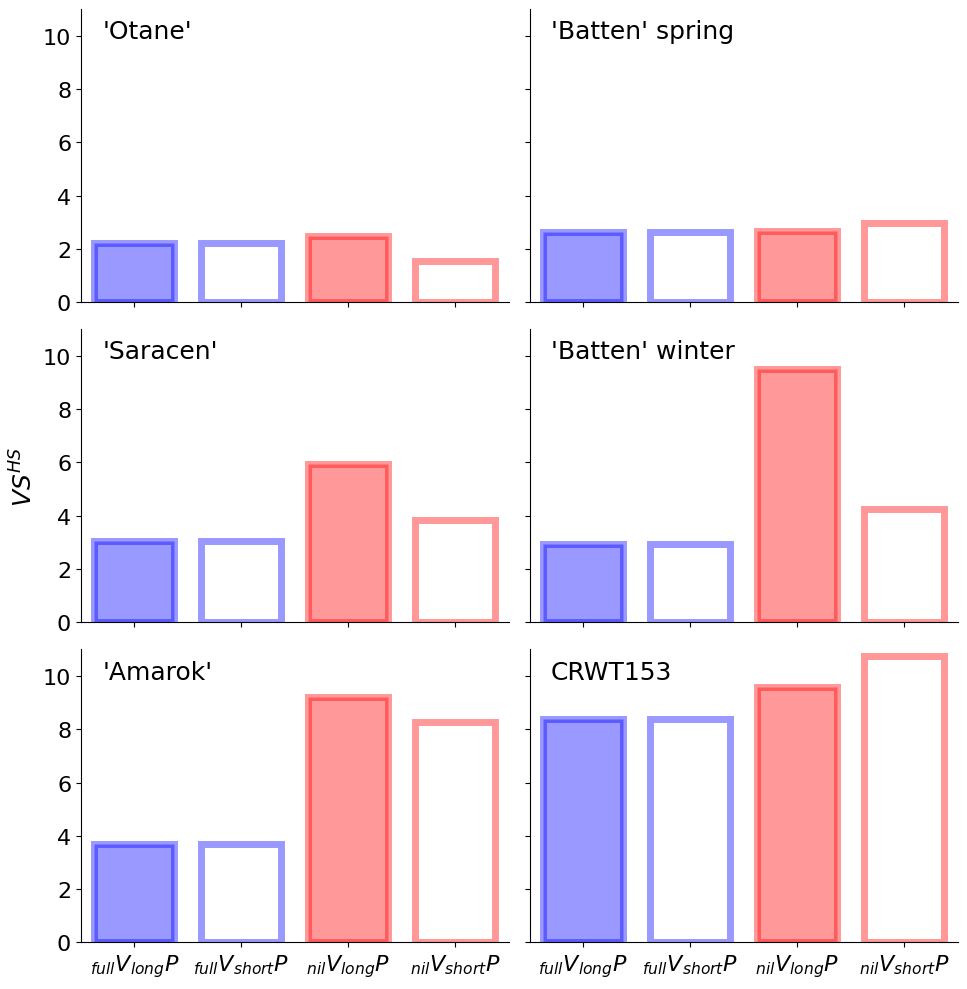

In [26]:
PhenoStages.loc[:,['HSFI','FITS']]
AllFLNData = Data.loc['YES',:].HS.reset_index().drop(['Date','Sample'],axis=1)

width = 0.3
ind = 0.4*np.arange(4) + width
Fig = plt.figure(figsize=(10, 10))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for cult in Cultivars:
    Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
    plt.bar(ind+0.3, PhenoStages.loc[[(16,'Full',cult),(8,'Full',cult),(16,'Nil',cult),(8,'Nil',cult)],'HSFI'], width,
            edgecolor=['b','b','r','r'], color = ['b','w','r','w'],
            linewidth=5,alpha=0.4)
    if Pos == 3:
        plt.ylabel('$VS^{HS}$',fontsize=18)
    plt.tick_params(labelsize=16)
    CultName = CultNames.loc[cult,'Name']
    plt.text(.05,.9,CultName,transform=Axis.transAxes,fontsize=18)
    plt.xticks(ind+width)
    plt.ylim(0,11)
    plt.xlim(0.4,2)
    Axis.spines['right'].set_visible(False)
    Axis.spines['top'].set_visible(False)
    if Pos in [5,6]:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    else:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
    if Pos in [2,4,6]:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
    else:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)
    Pos +=1
plt.tight_layout()
#Fig.savefig('FLN.png',bbox_inches='tight')   
Fig.patch.set_facecolor('white')

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\1391243820.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\1391243820.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_14508\1391243820.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
C:\U

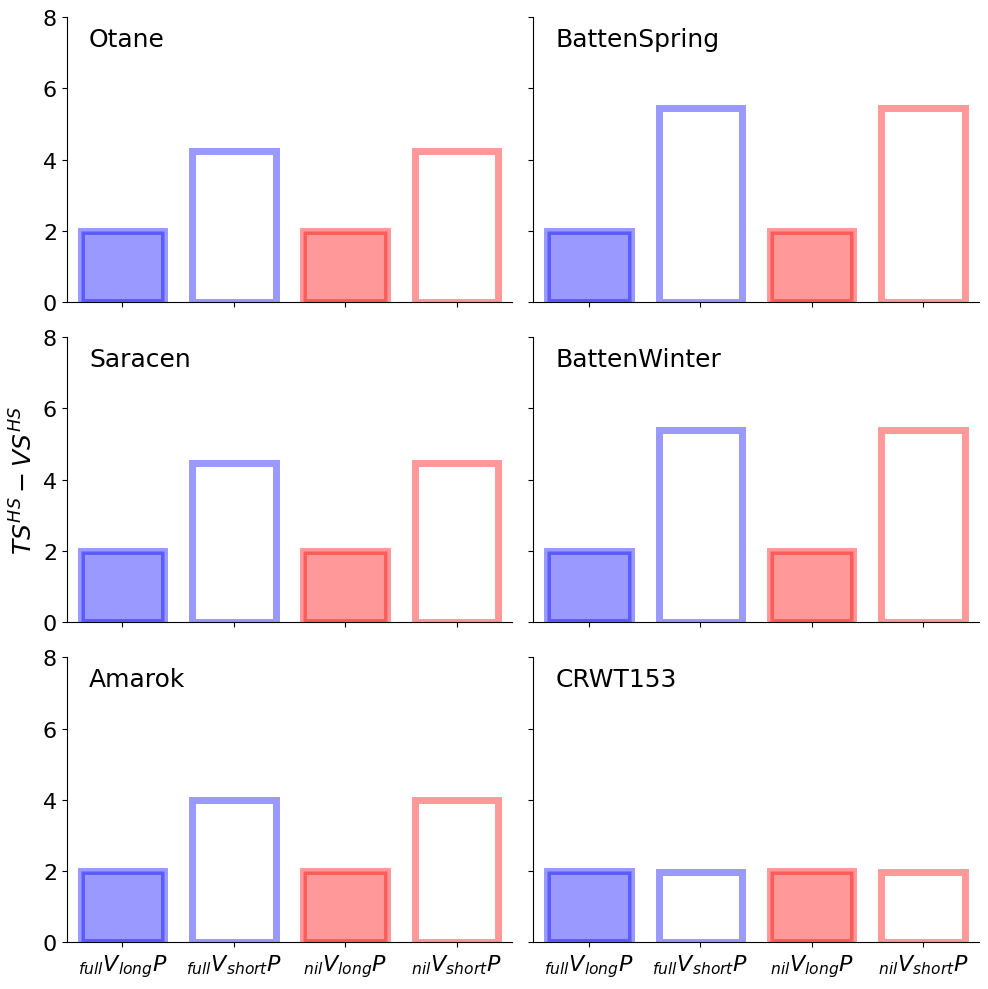

In [27]:
PhenoStages.loc[:,['HSFI','FITS']]
AllFLNData = Data.loc['YES',:].HS.reset_index().drop(['Date','Sample'],axis=1)

width = 0.3
ind = 0.4*np.arange(4) + width
Fig = plt.figure(figsize=(10, 10))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for cult in Cultivars:
    Axis = Fig.add_subplot(3,2,Pos, xticklabels=['$_{full}V_{long}P$','$_{full}V_{short}P$', '$_{nil}V_{long}P$', '$_{nil}V_{short}P$'])
    plt.bar(ind+0.3, PhenoStages.loc[[(16,'Full',cult),(8,'Full',cult),(16,'Nil',cult),(8,'Nil',cult)],'FITS'], width,
            edgecolor=['b','b','r','r'], color = ['b','w','r','w'],
            linewidth=5,alpha=0.4)
    if Pos == 3:
        plt.ylabel('$TS^{HS}-VS^{HS}$',fontsize=18)
    plt.tick_params(labelsize=16)
    plt.text(.05,.9,cult,transform=Axis.transAxes,fontsize=18)
    plt.xticks(ind+width)
    plt.ylim(0,8)
    plt.xlim(0.4,2)
    Axis.spines['right'].set_visible(False)
    Axis.spines['top'].set_visible(False)
    if Pos in [5,6]:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    else:
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
    if Pos in [2,4,6]:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
    else:
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True)
    Pos +=1
plt.tight_layout()
#Fig.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig6.jpg',format='jpg',dpi=100)      
Fig.patch.set_facecolor('white')

In [28]:
PhenoStages

FLN        TON         SN       HSTS  \
PhotoP Vern Cult                                                       
8      Full Amarok        11.342857  31.518519  20.175661   7.711688   
            BattenSpring  11.750000  26.750000        NaN   8.081818   
            BattenWinter  12.025000  29.000000  16.975000   8.331818   
            CRWT153       14.244444  34.244444        NaN  10.349495   
            Otane          9.111111  28.000000  18.888889   6.464646   
            Saracen       10.256410  29.256410        NaN   7.505828   
       Nil  Amarok        16.358974  34.666667  18.307692  12.271795   
            BattenSpring  12.141026  24.166667  12.025641   8.437296   
            BattenWinter  13.500000  27.600000  14.100000   9.672727   
            CRWT153       16.844444  33.844444        NaN  12.713131   
            Otane          8.355263  23.319149  14.963886   5.777512   
            Saracen       11.133333  26.076923  14.943590   8.303030   
16     Full Amarok         9.136364  26.333333  17.196970   5.705785   
            BattenSpring   7.947368  22.000000  14.052632   4.624880   
            BattenWinter   8.277778  21.750000  13.472222   4.925253   
            CRWT153       14.272727  33.000000  18.727273  10.375207   
            Otane          6.652174  20.956522  14.304348   4.229249   
            Saracen        7.545455  23.954545  16.409091   5.041322   
       Nil  Amarok        15.190476  36.157895  20.967419  11.209524   
            BattenSpring   8.000000  23.208333  15.208333   4.672727   
            BattenWinter  15.500000  33.705882  18.205882  11.490909   
            CRWT153       15.625000  34.666667  19.041667  11.604545   
            Otane          6.935484  22.258065  15.322581   4.486804   
            Saracen       10.714286  32.750000  22.035714   7.922078   

                              FITS       HSFI       ONFI  
PhotoP Vern Cult                                          
8      Full Amarok        4.000000   3.711688  10.111544  
            BattenSpring  5.454545   2.627273   7.824364  
            BattenWinter  5.409091   2.922727   8.391636  
            CRWT153       1.972727   8.376768  23.418371  
            Otane         4.236364   2.228283   7.058303  
            Saracen       4.463636   3.042191   8.621007  
       Nil  Amarok        4.000000   8.271795  23.162500  
            BattenSpring  5.454545   2.982751   8.506881  
            BattenWinter  5.409091   4.263636  11.706061  
            CRWT153       1.972727  10.740404  29.179735  
            Otane         4.236364   1.541148   5.739005  
            Saracen       4.463636   3.839394  10.480471  
16     Full Amarok        2.000000   3.705785  10.094490  
            BattenSpring  2.000000   2.624880   7.819770  
            BattenWinter  2.000000   2.925253   8.396485  
            CRWT153       2.000000   8.375207  23.414566  
            Otane         2.000000   2.229249   7.060158  
            Saracen       2.000000   3.041322   8.619339  
       Nil  Amarok        2.000000   9.209524  25.448214  
            BattenSpring  2.000000   2.672727   7.911636  
            BattenWinter  2.000000   9.490909  26.134091  
            CRWT153       2.000000   9.604545  26.411080  
            Otane         2.000000   2.486804   7.554663  
            Saracen       2.000000   5.922078  16.497114

In [29]:
Cultivars

['Otane', 'BattenSpring', 'Saracen', 'BattenWinter', 'Amarok', 'CRWT153']

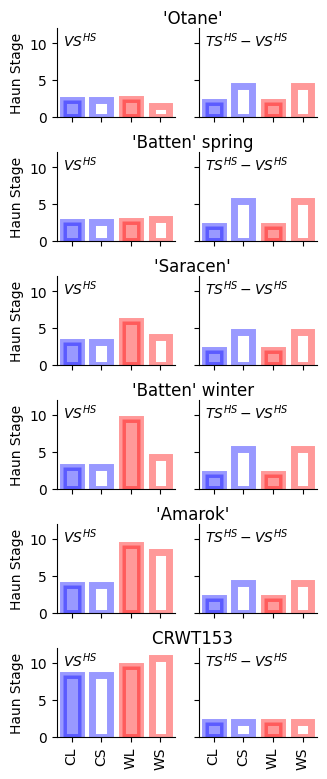

In [30]:
PhenoStages.loc[:,['HSFI','FITS']]
AllFLNData = Data.loc['YES',:].HS.reset_index().drop(['Date','Sample'],axis=1)

width = 0.6
ind = np.arange(4) 
Fig = plt.figure(figsize=(3.36, 9.2))
Photoperiods = [16,8]
Vernalisations = ['Full','Nil']

Pos = 1
for cult in Cultivars:
    for var in ['HSFI','FITS']: 
        Axis = Fig.add_subplot(6,2,Pos)
        plt.bar(ind, PhenoStages.loc[[(16,'Full',cult),(8,'Full',cult),(16,'Nil',cult),(8,'Nil',cult)],var], 
                width,# align='edge',
                edgecolor=['b','b','r','r'], color = ['b','w','r','w'],
                linewidth=5,alpha=0.4)
        plt.tick_params(labelsize=10)
        plt.ylim(0,12)
        Axis.spines['right'].set_visible(False)
        Axis.spines['top'].set_visible(False)
        CultName = CultNames.loc[cult,'Name']
        if Pos % 2 == 0:
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False)
            plt.text(.05,.8,'$TS^{HS}-VS^{HS}$',transform=Axis.transAxes,fontsize=10)
        else:
            plt.ylabel('Haun Stage')
            plt.text(.05,.8,'$VS^{HS}$',transform=Axis.transAxes,fontsize=10)
            plt.text(1.06,1.06,"    "+CultName,
                     horizontalalignment='center',transform=Axis.transAxes,fontsize=12)
        if Pos <11:
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False)
            plt.xticks(ind)
        else:
            plt.xticks(ind,['CL','CS', 'WL', 'WS'],rotation=90)
        plt.xlim(-0.5,3.5)
        plt.subplots_adjust(hspace=0.4)
        Pos +=1
#plt.tight_layout()
#Fig.savefig('C:\\Users\\cflhxb\\Dropbox\\WheatFlowering\\Fig6.jpg',pad_inches=10,dpi=300)
Fig.patch.set_facecolor('white')